<a href="https://colab.research.google.com/github/nithin0310/Olympics-Data-Analysis/blob/main/Olympics_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/Summer-Olympic-medals-1976-to-2008.csv', encoding='ISO-8859-1')

In [4]:
df.head(5)

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [5]:
# Overview of data shape and composition
print(df.shape)
print(df.info())

(15433, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB
None


In [6]:
# Handling missing values
df.dropna(inplace=True)
print("After dropping null values:", df.shape)

After dropping null values: (15316, 11)


In [7]:
# Add a count column for easier aggregation
df['Count'] = 1

In [8]:
# Convert categorical columns to appropriate types
df['Gender'] = df['Gender'].astype('category')

medal_order = ['Bronze', 'Silver', 'Gold']
df['Medal'] = pd.Categorical(df['Medal'], categories=medal_order, ordered=True)

In [9]:
# Extracting and converting Year column
df['Year'] = df['Year'].astype(str).str.extract('(\d{4})')
year_order = ['1976', '1980', '1984', '1988', '1992', '1996', '2000', '2004', '2008']
df['Year'] = pd.Categorical(df['Year'], categories=year_order, ordered=True)

<ipython-input-13-dd81893f28bd>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Year')['Count'].size().plot.line(color='darkgreen', linewidth=5)


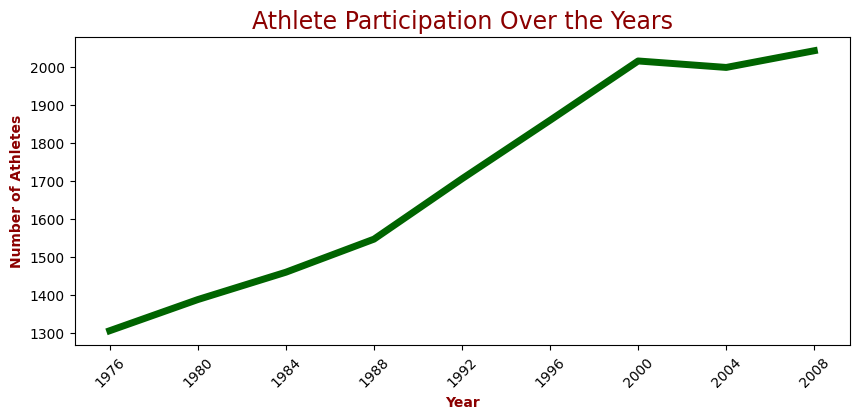

In [13]:
# Athletes participation trend over time
plt.figure(figsize=(10, 4))
df.groupby('Year')['Count'].size().plot.line(color='darkgreen', linewidth=5)
plt.title('Athlete Participation Over the Years', fontsize=17, color='darkred')
plt.xlabel('Year', fontweight='bold', color='darkred')
plt.ylabel('Number of Athletes', fontweight='bold', color='darkred')
plt.xticks(rotation=45)
plt.show()

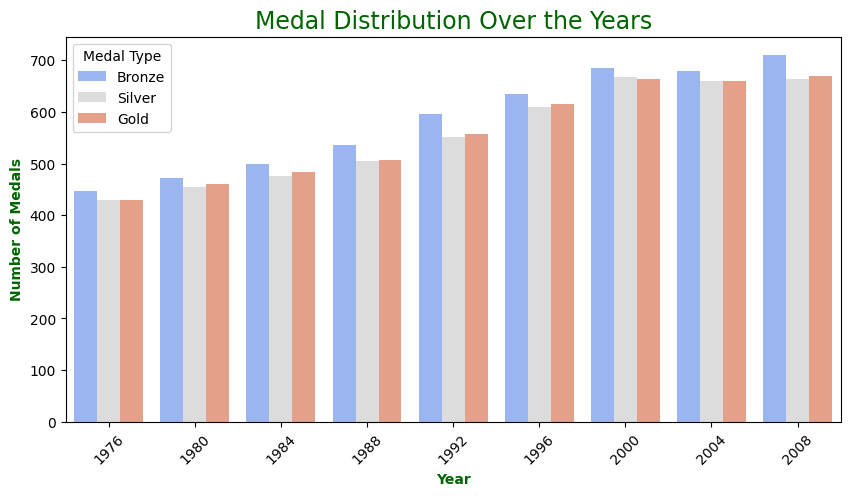

In [14]:
# Medal distribution by year
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Year', hue='Medal', palette='coolwarm')
plt.title('Medal Distribution Over the Years', fontsize=17, color='darkgreen')
plt.xlabel('Year', fontweight='bold', color='darkgreen')
plt.ylabel('Number of Medals', fontweight='bold', color='darkgreen')
plt.legend(title='Medal Type')
plt.xticks(rotation=45)
plt.show()

<ipython-input-15-4a09979a1068>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Athlete', order=top_athletes, palette='flare')


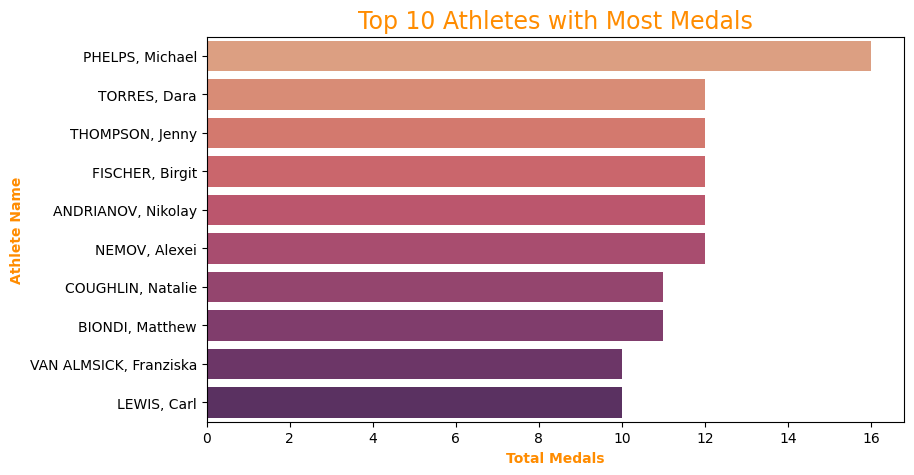

In [15]:
# Top 10 athletes with most medals
plt.figure(figsize=(9, 5))
top_athletes = df['Athlete'].value_counts().head(10).index
sns.countplot(data=df, y='Athlete', order=top_athletes, palette='flare')
plt.title('Top 10 Athletes with Most Medals', fontsize=17, color='darkorange')
plt.xlabel('Total Medals', fontweight='bold', color='darkorange')
plt.ylabel('Athlete Name', fontweight='bold', color='darkorange')
plt.show()

<ipython-input-16-dc14b0d811d6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Country', order=top_countries, palette='viridis')


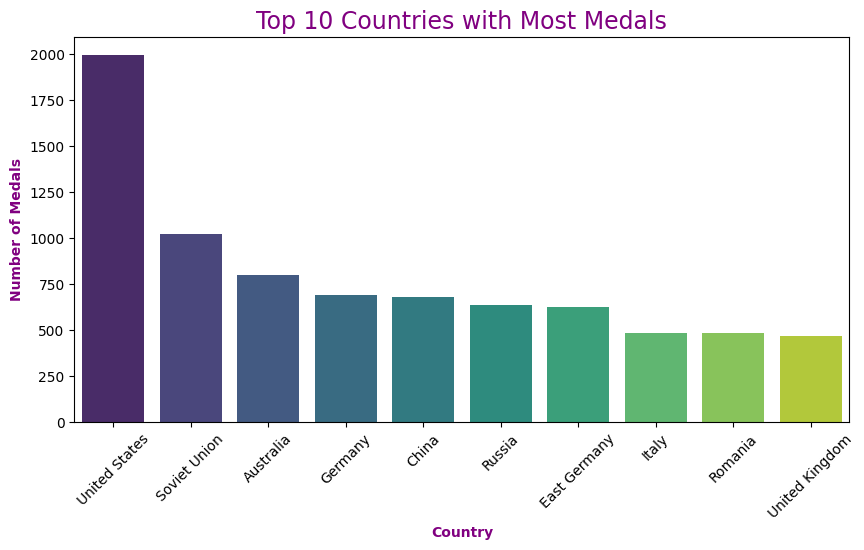

In [16]:
# Top 10 countries with most medals
plt.figure(figsize=(10, 5))
top_countries = df['Country'].value_counts().head(10).index
sns.countplot(data=df, x='Country', order=top_countries, palette='viridis')
plt.title('Top 10 Countries with Most Medals', fontsize=17, color='purple')
plt.xlabel('Country', fontweight='bold', color='purple')
plt.ylabel('Number of Medals', fontweight='bold', color='purple')
plt.xticks(rotation=45)
plt.show()

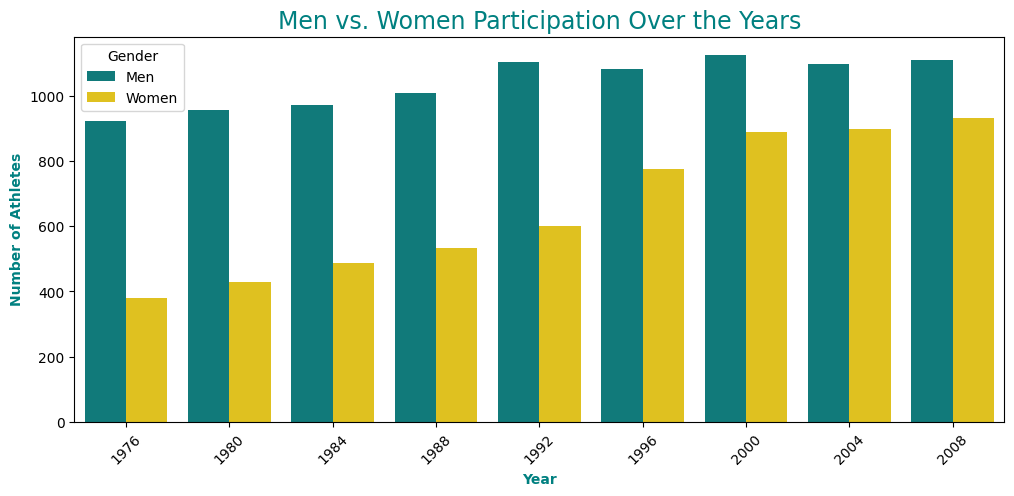

In [17]:
# Gender distribution over time
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Year', hue='Gender', palette=['darkcyan', 'gold'])
plt.title('Men vs. Women Participation Over the Years', fontsize=17, color='teal')
plt.xlabel('Year', fontweight='bold', color='teal')
plt.ylabel('Number of Athletes', fontweight='bold', color='teal')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()

<ipython-input-18-b3f8044147ff>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sport', order=top_sports, palette='Spectral')


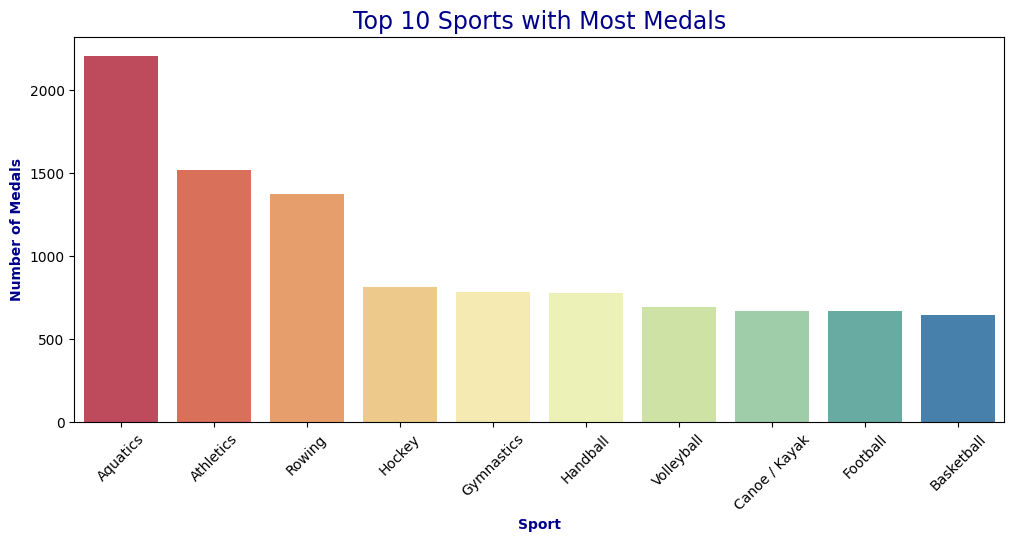

In [18]:
# Distribution of Medals by Sport
plt.figure(figsize=(12, 5))
top_sports = df['Sport'].value_counts().head(10).index
sns.countplot(data=df, x='Sport', order=top_sports, palette='Spectral')
plt.title('Top 10 Sports with Most Medals', fontsize=17, color='darkblue')
plt.xlabel('Sport', fontweight='bold', color='darkblue')
plt.ylabel('Number of Medals', fontweight='bold', color='darkblue')
plt.xticks(rotation=45)
plt.show()

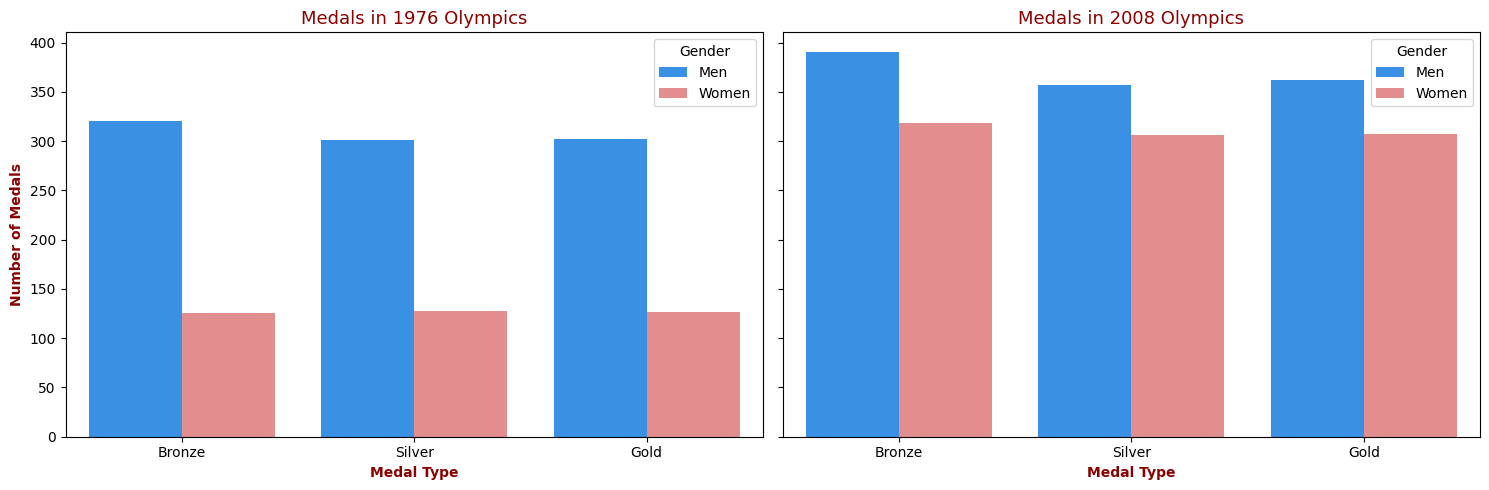

In [19]:
# Medal count comparison for 1976 vs 2008
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.countplot(data=df[df['Year'] == '1976'], x='Medal', hue='Gender', palette=['dodgerblue', 'lightcoral'], ax=axes[0])
axes[0].set_title('Medals in 1976 Olympics', fontsize=13, color='darkred')
axes[0].set_xlabel('Medal Type', fontweight='bold', color='darkred')
axes[0].set_ylabel('Number of Medals', fontweight='bold', color='darkred')

sns.countplot(data=df[df['Year'] == '2008'], x='Medal', hue='Gender', palette=['dodgerblue', 'lightcoral'], ax=axes[1])
axes[1].set_title('Medals in 2008 Olympics', fontsize=13, color='darkred')
axes[1].set_xlabel('Medal Type', fontweight='bold', color='darkred')

plt.tight_layout()
plt.show()

<ipython-input-20-c4073577a933>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medal_trends = df.groupby(['Year', 'Medal'])['Count'].sum().unstack()


<Figure size 1200x500 with 0 Axes>

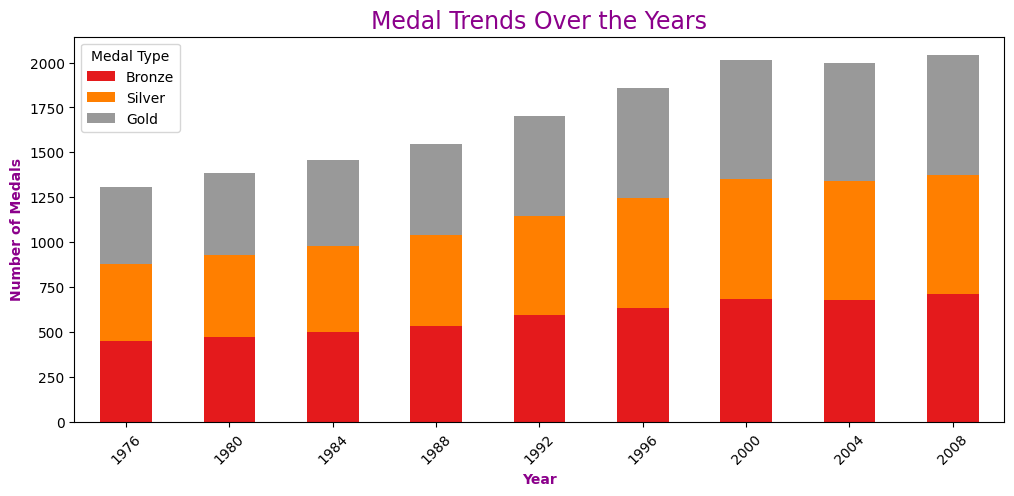

In [20]:
# Medal Trends Over Time
plt.figure(figsize=(12, 5))
medal_trends = df.groupby(['Year', 'Medal'])['Count'].sum().unstack()
medal_trends.plot(kind='bar', stacked=True, colormap='Set1', figsize=(12, 5))
plt.title('Medal Trends Over the Years', fontsize=17, color='darkmagenta')
plt.xlabel('Year', fontweight='bold', color='darkmagenta')
plt.ylabel('Number of Medals', fontweight='bold', color='darkmagenta')
plt.xticks(rotation=45)
plt.legend(title='Medal Type')
plt.show()